**2장 – 머신러닝 프로젝트 처음부터 끝까지**

*머신러닝 부동산 회사에 오신 것을 환영합니다! 여러분이 할 작업은 캘리포니아 지역 주택의 여러 특성을 사용해 중간 가격을 예측하는 것입니다.*

*이 노트북은 2장의 모든 샘플 코드와 연습 문제 정답을 담고 있습니다.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*코랩에서 맷플롯립과 판다스 그래프에 한글을 쓰려면 다음 코드의 주석을 제거하고 실행하세요*

In [ ]:
# import sys

# # 노트북이 코랩에서 실행 중인지 체크합니다.
# if 'google.colab' in sys.modules:
#     !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
#     # 나눔 폰트를 설치합니다.
#     !sudo apt-get -qq -y install fonts-nanum
#     import matplotlib.font_manager as fm
#     font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
#     for fpath in font_files:
#         fm.fontManager.addfont(fpath)

#     # 나눔바른고딕 폰트로 설정합니다.
#     import matplotlib.pyplot as plt
#     plt.rc('font', family='NanumBarunGothic')
#     # 마이너스 기호 표시 오류 수정
#     import matplotlib
#     matplotlib.rcParams['axes.unicode_minus'] = False

# 설정

In [1]:
print("머신러닝 세계에 오신 것을 환영합니다!")

머신러닝 세계에 오신 것을 환영합니다!


파이썬 3.7 또는 그 이상이 필요합니다:

In [90]:
import sys

assert sys.version_info >= (3, 7)

Scikit-Learn ≥1.0.1이 필요합니다:

In [91]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# 2.3 데이터 가져오기

## 2.3.5 데이터 다운로드하기

In [92]:
# 슬라이드 20의 코드
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url="https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing=load_housing_data()

## 2.3.6 데이터 구조 훑어 보기

In [93]:

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [94]:
# info()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [95]:
# "ocean_proximity" 열의 값 세기
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [96]:
# describe()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


다음 셀은 책에 없습니다. `images/end_to_end_project` 폴더가 없다면 이 폴더를 만들고 고해상도 이미지 저장을 위해 노트북에서 사용할 `save_fig()` 함수를 정의합니다.

In [97]:
# 추가 코드 - 고해상도 PNG 파일로 그래프를 저장하기 위한 코드

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

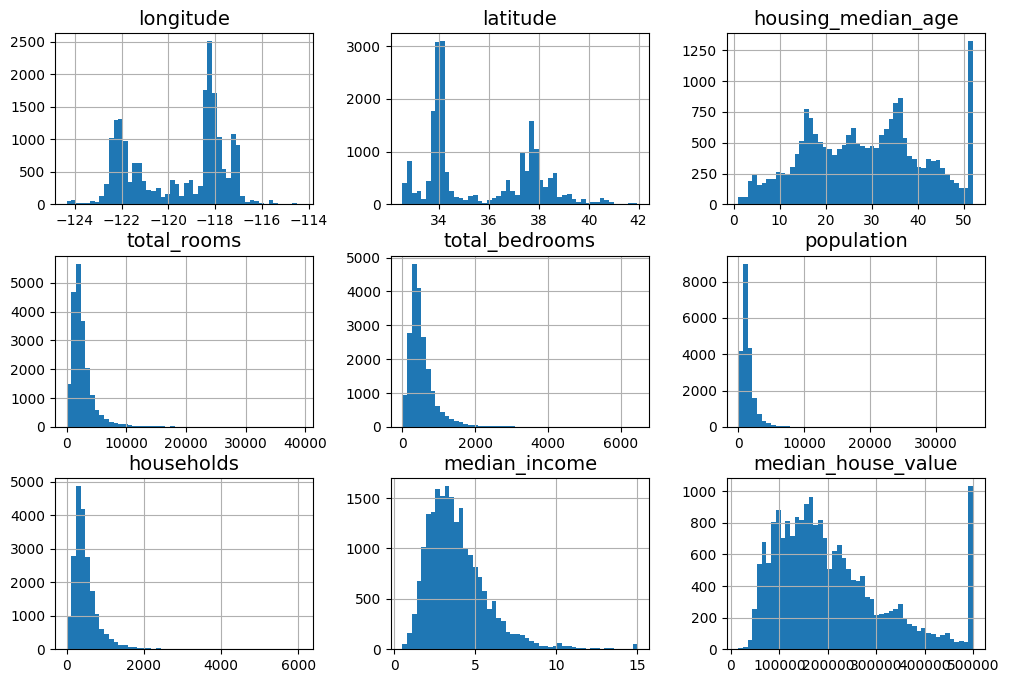

In [98]:
import matplotlib.pyplot as plt

# 추가 코드 – 다음 다섯 라인은 기본 폰트 크기를 지정합니다
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# 히스토그램 그리기
housing.hist(bins=50, figsize=(12,8))
plt.show()


## 2.3.7 테스트 세트 만들기

In [99]:
# shuffle_and_split_data()
import numpy as np

def shuffle_and_split_Data(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [100]:

# len(train_set)
train_set, test_set = shuffle_and_split_Data(housing, 0.2)
len(train_set)


16512

In [101]:
# len(test_set)
train_set, test_set = shuffle_and_split_Data(housing, 0.2)
len(test_set)


4128

노트북 실행 결과를 일정하게 유지하기 위해 랜덤 시드를 설정합니다:

In [102]:
np.random.seed(42)

하지만 여러 변동 요인으로 인해 노트북이 책에 실린 것과 완전히 똑같은 출력을 만든다고 보장하지 않습니다. 가장 중요한 요소는 라이브러리가 업데이트되면서 시간이 지나면서 알고리즘이 조금씩 바뀌는 것입니다. 따라서 약간의 차이는 이해해 주세요. 아마도 대부분의 출력은 동일하거나 적어도 같은 범주에 있을 겁니다.

Note: 또 다른 무작위성 요소는 파이썬 set의 순서입니다. 파이썬 시작시에 랜덤하게 시드가 부여되는 `hash()` 함수를 기반으로 합니다(DoS 공격을 막기 위해 파이썬 3.3부터 적용되었습니다). 이런 무작위성을 제거하려면 파이썬을 시작하기 _전에_ `PYTHONHASHSEED` 환경 변수를 `"0"`으로 설정합니다. 파이썬을 시작한 후에 이를 설정하면 아무런 효과가 없습니다. 다행히 코랩에서 노트북을 실행하면 이 변수가 항상 설정됩니다.

In [103]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [104]:
housing_with_id = housing.reset_index()  # `index` 열 추가
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [105]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [106]:
# train_test_split()
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state =42)

In [107]:
test_set["total_bedrooms"].isnull().sum()

np.int64(44)

인구의 여성 비율이 51.1%일 때 1,000명으로 구성된 랜덤 샘플에서 여성이 48.5% 보다 작거나 53.3% 보다 많을 확률을 계산하려면 [이항 분포](https://en.wikipedia.org/wiki/Binomial_distribution)를 사용합니다. 이항 분포의 `cdf()` 메서드는 여성의 수가 주어진 값보다 작거나 같을 확률을 반환합니다.

In [108]:
# 추가 코드 – 나쁜 샘플을 얻을 확률 10.7%를 계산하는 방법

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


수학 대신 시물레이션을 해도 거의 동일한 결과를 얻을 수 있습니다:

In [109]:
# 추가 코드 – 나쁜 샘플을 얻을 확률을 시물레이션으로 계산 하는 방법

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

np.float64(0.1071)

In [110]:
# pd.cut()을 사용한 소득 카테고리 생성
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0, 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

/tmp/ipykernel_4607/3664423054.py:9: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4607/3664423054.py:9: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4607/3664423054.py:9: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4607/3664423054.py:9: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4607/3664423054.py:9: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4607/3664423054.py:9: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4607/3664423054.py:9: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp

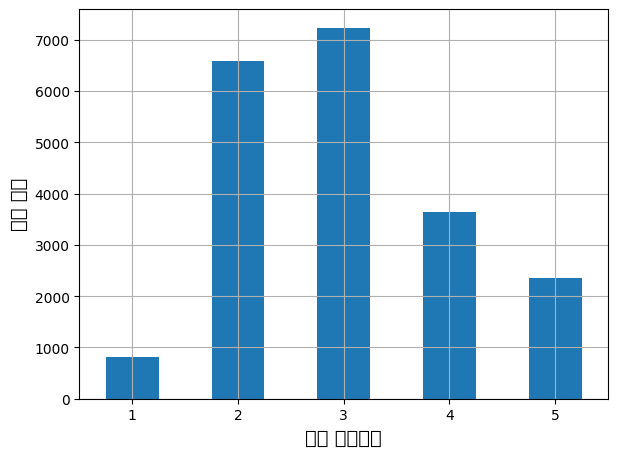

In [111]:
# housing_income_cat_bar_plot 그래프를 저장합니다
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show
save_fig("housing_income_cat_bar_plot")  # extra code
# plt.show()

In [112]:
# StratifiedShuffleSplit

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [113]:
# strat_train_set, strat_test_set = strat_splits[0]
strat_train_set, strat_test_set = strat_splits[0]

하나의 계층적 분할을 얻기 위해서는 이 방법이 훨씬 간단합니다:

In [114]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [115]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [116]:
# 추가 코드 – 그림 2–10를 생성합니다.

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [117]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 2.4 데이터 이해를 위한 탐색과 시각화

In [118]:
housing = strat_train_set.copy()

## 2.4.1 지리적 데이터 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


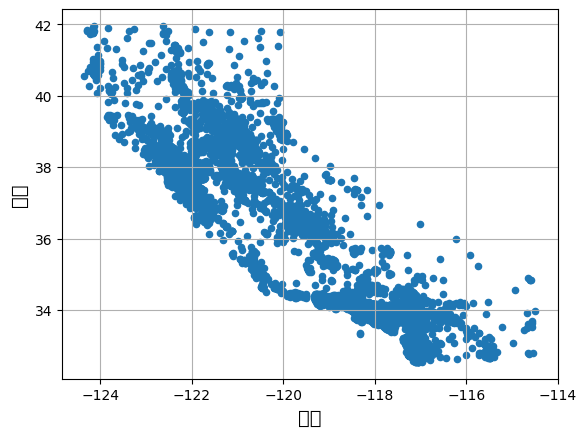

In [119]:
# bad_visualization_plot

save_fig("bad_visualization_plot")  # extra code
# plt.show()
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


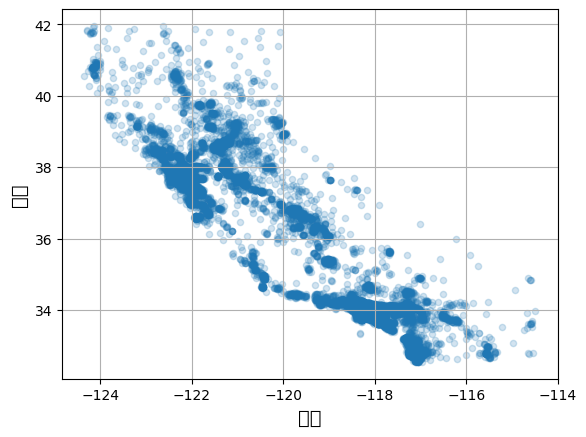

In [120]:
# better_visualization_plot

save_fig("better_visualization_plot")  # extra code
# plt.show()
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,alpha=0.2)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/IPython/c

<Figure size 640x480 with 0 Axes>

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) D

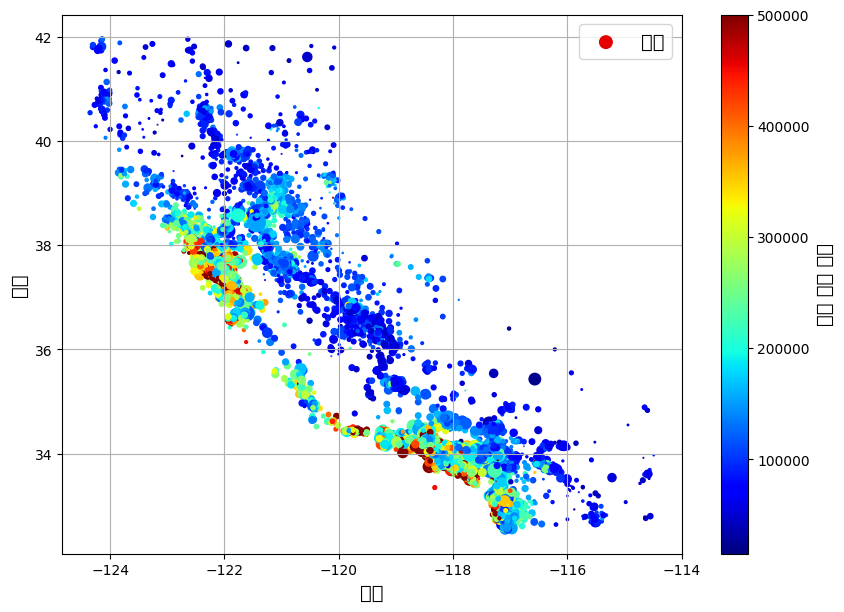

In [121]:
# housing_prices_scatterplot

save_fig("housing_prices_scatterplot")  # extra code
# plt.show()
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/100, label="인구", c="median_house_value", cmap="jet", colorbar=True, legend=True, figsize=(10,7))
cax=plt.gcf().get_axes()[1]
cax.set_ylabel("중간 주택 가격")
plt.xlabel("경도")
plt.ylabel("위도")
plt.show

다음 셀은 이 장에 있는 첫 번째 그림을 생성합니다(이 코드는 책이 없습니다). 이 그림은 배경에 캘리포니아 이미지를 넣고, 레이블 이름을 바꾸고, 그리드를 삭제하여 이전 그림을 더 멋있게 만든 것입니다.

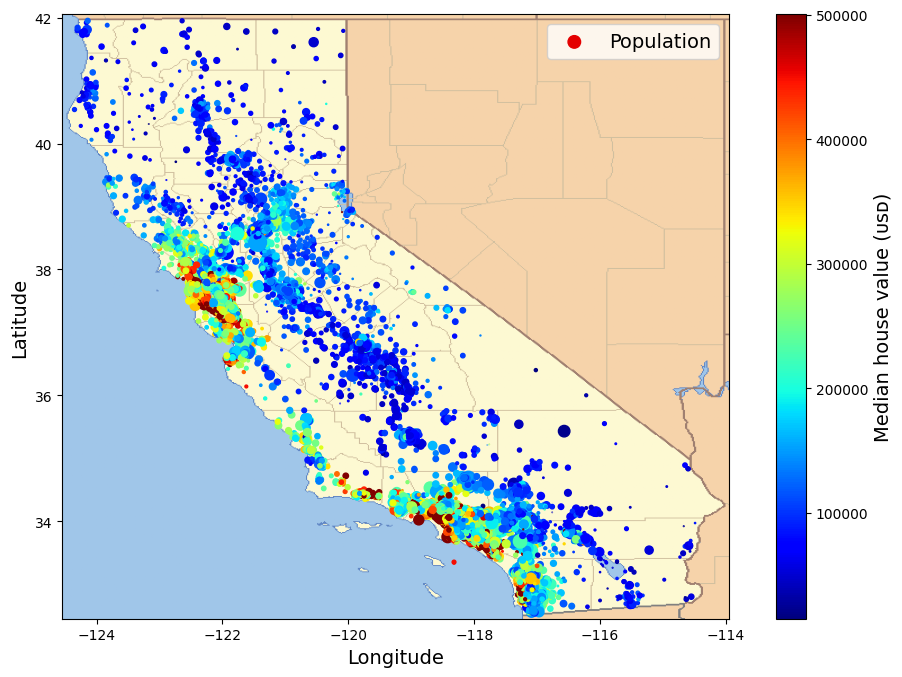

In [122]:
# 추가 코드 – 이 셀은 이 장의 첫 번째 그림을 생성합니다

#  캘리포니아 이미지를 다운로드합니다
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

## 2.4.2 상관관계 조사

In [123]:
# 판다스 1.5버전부터 수치형 데이터만 포함하는지 여부를 결정하는 `numeric_only` 매개변수가 추가되었습니다.
# 이 매개변수의 기본값은 `True`입니다.
# 판다스 2.0버전에서 기본값이 `False`로 바뀌므로 명시적으로 `numeric_only=True`로 지정합니다.

# 슬라이드 37의 코드
corr_matrix = housing.corr(numeric_only=True)

In [124]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

<Figure size 640x480 with 0 Axes>

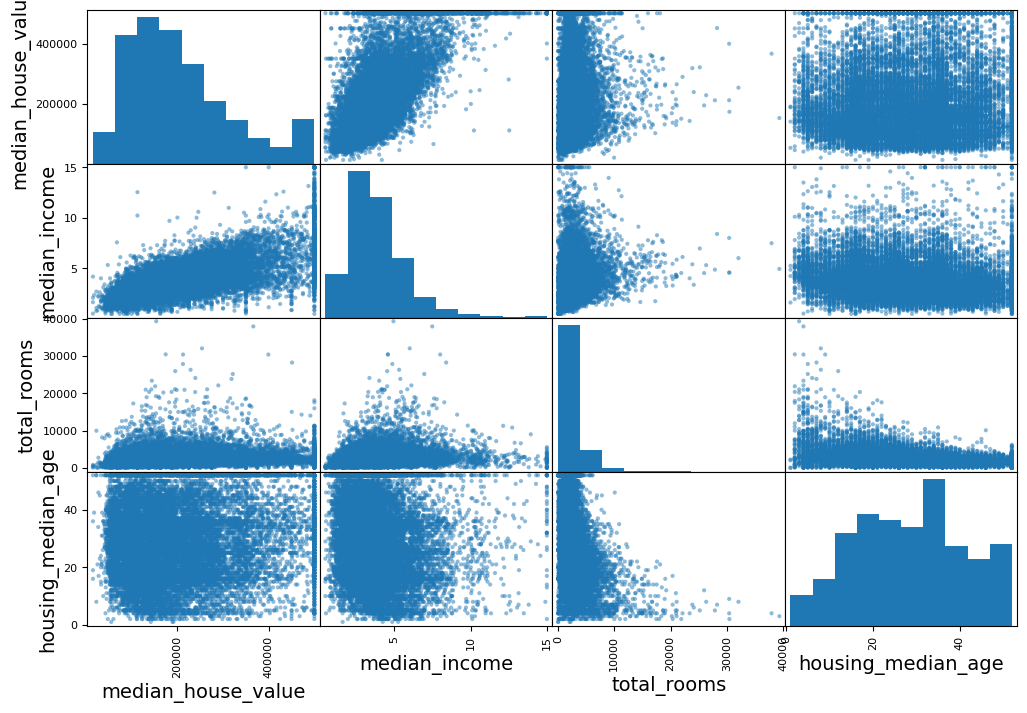

In [125]:
# scatter_matrix

save_fig("scatter_matrix_plot")  # 추가 코드
# plt.show()
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

<Figure size 640x480 with 0 Axes>

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) 

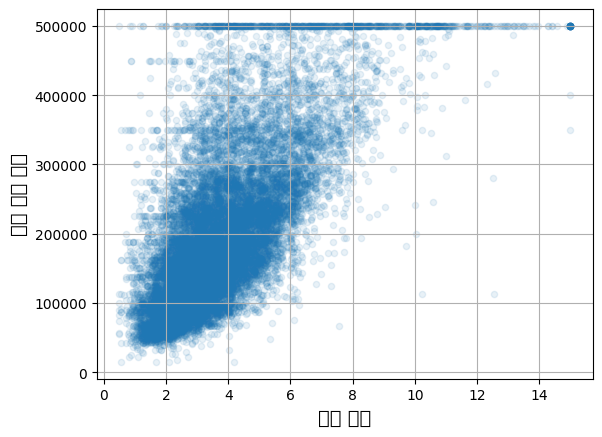

In [126]:
# income_vs_house_value_scatterplot

save_fig("income_vs_house_value_scatterplot")  # 추가 코드
# plt.show()
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1, grid=True)
plt.xlabel("중간 소득")
plt.ylabel("중간 주택 가격")
plt.show()

## 2.4.3 특성 조합으로 실험

In [127]:
# 특성 조합으로 새로운 특성 만들기 (슬라이드 44)
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_house"] = housing["population"] / housing["households"]

In [128]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688380
rooms_per_house         0.143663
total_rooms             0.137455
housing_median_age      0.102175
households              0.071426
total_bedrooms          0.054635
population             -0.020153
population_per_house   -0.038224
longitude              -0.050859
latitude               -0.139584
bedrooms_ratio         -0.256397
Name: median_house_value, dtype: float64

# 2.5 머신러닝 알고리즘을 위한 데이터 준비

원본 훈련 세트로 복원하고 타깃을 분리합니다(`strat_train_set.drop()`은 지정한 열을 제외한 `strat_train_set`의 복사본을 만듭니다. `inplace=True`로 지정하지 않은 한 `strat_train_set` 자체를 수정하지 않습니다).

In [129]:
# median_house_value를 제외한 특성 목록 (슬라이드 45)
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## 2.5.1 데이터 정제

책에 소개된 세 개의 옵션은 다음과 같습니다:

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # 옵션 1

housing.drop("total_bedrooms", axis=1)                     # 옵션 2

median = housing["total_bedrooms"].median()                # 옵션 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

각 옵션에 대해 `housing`을 오염시키지 않기 위해 복사본을 만들어 사용합니다. 각 옵션의 출력을 확인하지만 NaN 값을 담고 있는 행은 필터링하겠습니다.

In [130]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [131]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # 옵션 1

housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [132]:
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # 옵션 2

housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [133]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # 옵션 3

housing_option3.loc[null_rows_idx].head()

/tmp/ipykernel_4607/2372877837.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median, inplace=True)  # 옵션 3


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


In [134]:
# SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")


`"median"` 전략을 사용하기 위해 수치 특성을 분리합니다(`ocean_proximity` 같은 텍스트 특성에서는 계산할 수 없습니다):

In [135]:
# housing_num
housing_num = housing.select_dtypes(include=[np.number])

In [136]:
# imputer.fit(housing_num)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [137]:
# imputer.statistics_
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

각 특성의 중간 값을 수동으로 계산한 것과 같은지 확인해 보세요:

In [138]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

훈련 세트를 변환합니다:

In [139]:
X = imputer.transform(housing_num)

In [140]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [141]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [142]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [143]:
imputer.strategy

'median'

In [144]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [145]:
housing_tr.loc[null_rows_idx].head()  # not shown in the book

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [146]:
from sklearn import set_config
#
set_config(transform_output="pandas")  # scikit-learn >= 1.2

이상치를 삭제합니다:

In [147]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [148]:
outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

이상치를 삭제하고 싶다면 다음 코드를 실행하세요:

In [149]:
housing = housing.iloc[outlier_pred == 1]
housing_labels = housing_labels.iloc[outlier_pred == 1]

## 2.5.2 텍스트와 범주형 특성 다루기

이제 범주형 입력 특성인 `ocean_proximity`을 전처리합니다:

In [150]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN


In [151]:
# OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [152]:
housing_cat_encoded[:8]

,ocean_proximity
14973,0.0
3785,1.0
14689,1.0
20507,4.0
1286,1.0
18078,0.0
4396,3.0
18031,0.0


In [153]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [216]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 사용 (희소 행렬 대신 밀집 배열을 반환)
cat_encoder = OneHotEncoder(sparse_output=False)

# 범주형 열 인코딩
housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])

# 결과 출력
print(housing_cat_1hot)


       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
14973                        1.0                     0.0   
3785                         0.0                     1.0   
14689                        0.0                     1.0   
20507                        0.0                     0.0   
1286                         0.0                     1.0   
...                          ...                     ...   
14207                        1.0                     0.0   
13105                        0.0                     1.0   
19301                        0.0                     0.0   
19121                        1.0                     0.0   
19888                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
14973                     0.0                       0.0   
3785                      0.0                       0.0   
14689                     0.0                       0.0   
20507                     0.0              

In [217]:
housing_cat_1hot

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
1286,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


`OneHotEncoder`는 기본적으로 희소 행렬을 반환합니다. 필요하면 `toarray()` 메서드를 사용해 밀집 배열로 변환할 수 있습니다:

In [218]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 사용 (희소 행렬 대신 밀집 배열 반환)
cat_encoder = OneHotEncoder(sparse_output=False)

# 범주형 열 인코딩
housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])

# 결과 출력 (toarray() 불필요)
print(housing_cat_1hot)


       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
14973                        1.0                     0.0   
3785                         0.0                     1.0   
14689                        0.0                     1.0   
20507                        0.0                     0.0   
1286                         0.0                     1.0   
...                          ...                     ...   
14207                        1.0                     0.0   
13105                        0.0                     1.0   
19301                        0.0                     0.0   
19121                        1.0                     0.0   
19888                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
14973                     0.0                       0.0   
3785                      0.0                       0.0   
14689                     0.0                       0.0   
20507                     0.0              

또는 `OneHotEncoder`를 만들 때 `sparse=False`로 지정할 수 있습니다:

In [156]:
# 사이킷런 1.2버전에서 `sparse_output` 매개변수가 추가되었고 `sparse` 매개변수는 1.4버전에서 삭제됩니다.
# 이에 대한 경고를 피하려면 `sparse_output`을 사용하세요.
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
1286,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


In [157]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [158]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [159]:
cat_encoder.transform(df_test)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0


In [160]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [161]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


In [162]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [163]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [164]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [165]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


## 2.5.3 특성 스케일링

In [166]:
# MinMaxScalar
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)


In [167]:
# StandardScalar
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)


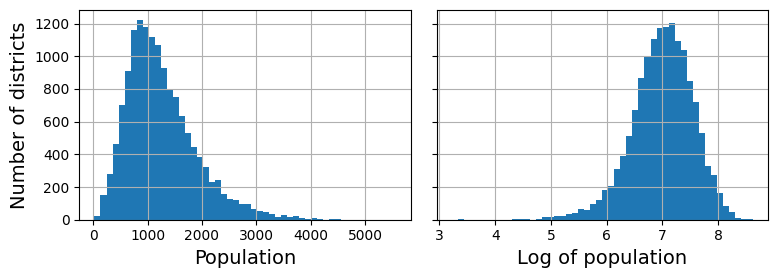

In [168]:
# 추가 코드 – 이 셀은 그림 2–17을 생성합니다
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

각 값을 백분위수로 바꾸면 어떻게 될까요?

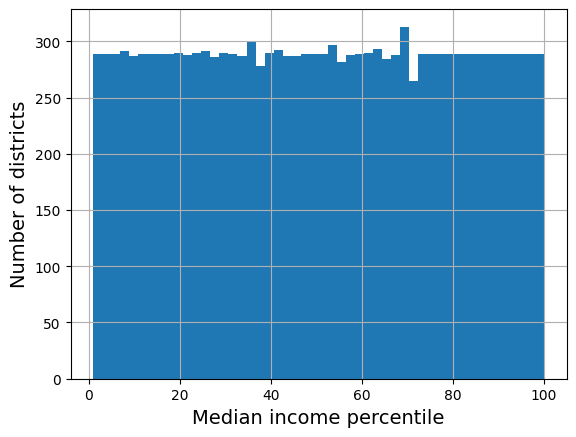

In [169]:
# 추가 코드 – 균등 분포를 얻는다는 것을 보여줍니다
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: 1 백분위수 아래의 소득은 1로 레이블되고 99 백분위수 이상의 값은 100으로 레이블됩니다.
# 이 때문에 아래 분포의 범위가 1에서부터 100까지입니다(0에서부터 100까지가 아닙니다).

In [170]:
# rbf_kernel (슬라이드 68)
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)


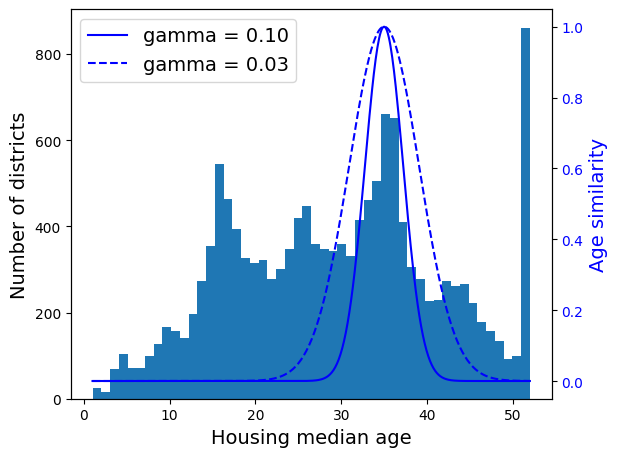

In [171]:
# 추가 코드 – 이 셀은 그림 2–18을 생성 합니다

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # x축을 공유 하는 쌍둥이 축을 만듭니다
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

In [172]:
# LinearRegression
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # 새로운 데이터라고 가정합니다

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [173]:
predictions

array([[307649.58358784],
       [143451.50154782],
       [135759.63057829],
       [192702.83891231],
       [184498.77560018]])

In [174]:
# TransformedTargetRegressor
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [175]:
predictions

array([307649.58358784, 143451.50154782, 135759.63057829, 192702.83891231,
       184498.77560018])

## 2.5.4 사용자 정의 변환기

간단한 변환기를 만들어 보죠:

In [176]:
# FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [177]:
# rbf_transformer = ...
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:303: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))


In [178]:
age_simil_35

array([[8.20849986e-02],
       [6.70320046e-01],
       [8.48904403e-15],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [179]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:303: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))


In [180]:
sf_simil

array([[0.05258419],
       [0.94864161],
       [0.01192662],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

In [181]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [182]:
# StandardScalarClone
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # *args나 **kwargs를 사용하지 않습니다!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # 사용하지 않더라도 y를 넣어 주어야 합니다
        X = check_array(X)  # X가 부동소수점 배열인지 확인합니다
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # 모든 추정기는 fit()에서 이를 저장합니다.
        return self  # 항상 self를 반환합니다!

    def transform(self, X):
        check_is_fitted(self)  # (훈련으로) 학습된 속성이 있는지 확인합니다
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [183]:
# ClusterSimilarity
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        # 사이킷런 1.2버전에서 최상의 결과를 찾기 위해 반복하는 횟수를 지정하는 `n_init` 매개변수 값에 `'auto'`가 추가되었습니다.
        # `n_init='auto'`로 지정하면 초기화 방법을 지정하는 `init='random'`일 때 10, `init='k-means++'`일 때 1이 됩니다.
        # 사이킷런 1.4버전에서 `n_init`의 기본값이 10에서 `'auto'`로 바뀝니다. 경고를 피하기 위해 `n_init=10`으로 지정합니다.
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # 항상 self를 반환합니다!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"클러스터 {i} 유사도" for i in range(self.n_clusters)]

In [184]:
# cluster_simil = ...
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

In [185]:
similarities[:3].round(2)

,클러스터 0 유사도,클러스터 1 유사도,클러스터 2 유사도,클러스터 3 유사도,클러스터 4 유사도,클러스터 5 유사도,클러스터 6 유사도,클러스터 7 유사도,클러스터 8 유사도,클러스터 9 유사도
14973,0.00,0.99,0.04,0.0,0.0,0.0,0.00,0.65,0.00,0.34
3785,0.47,0.00,0.00,0.7,0.0,0.0,0.29,0.00,0.17,0.00
14689,0.00,0.22,0.49,0.0,0.0,0.0,0.00,0.62,0.00,0.00


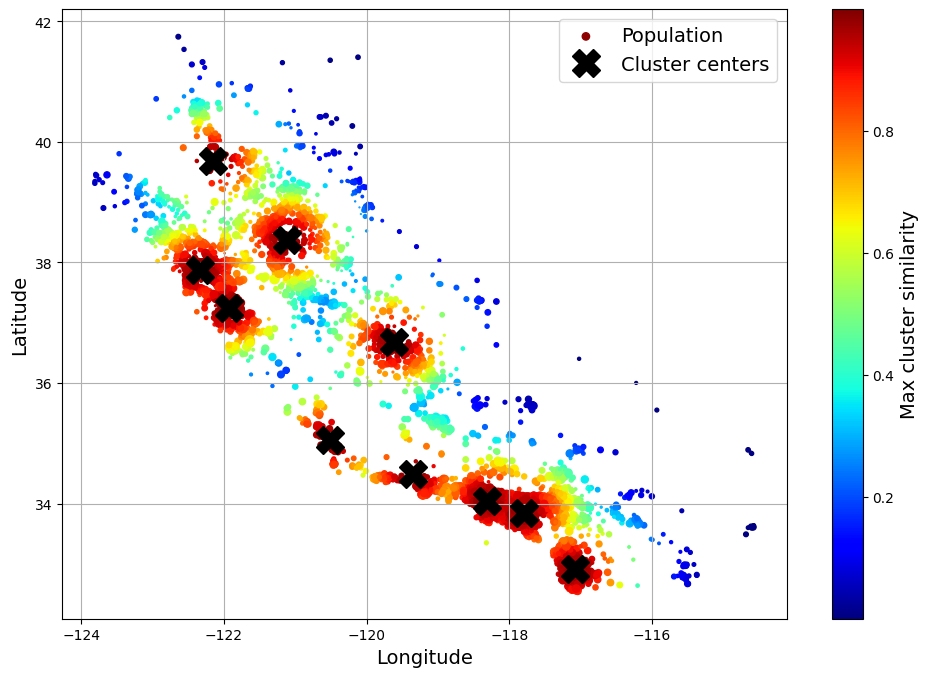

In [186]:
# 추가 코드 – 이 셀은 그림 2–19를 생성합니다

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

## 2.5.5 변환 파이프라인

수치 특성을 전처리하는 파이프라인을 만들어 보겠습니다:

In [187]:
# Pipeline
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [188]:
# make_pipeline
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [189]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [190]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.42,1.01,1.86,0.31,1.37,0.14,1.39,-0.94
14973,0.60,-0.70,0.91,-0.31,-0.44,-0.69,-0.37,1.17


In [ ]:
# def monkey_patch_get_signature_names_out():
#     """Monkey patch some classes which did not handle get_feature_names_out()
#        correctly in Scikit-Learn 1.0.*."""
#     from inspect import Signature, signature, Parameter
#     import pandas as pd
#     from sklearn.impute import SimpleImputer
#     from sklearn.pipeline import make_pipeline, Pipeline
#     from sklearn.preprocessing import FunctionTransformer, StandardScaler

#     default_get_feature_names_out = StandardScaler.get_feature_names_out

#     if not hasattr(SimpleImputer, "get_feature_names_out"):
#       print("Monkey-patching SimpleImputer.get_feature_names_out()")
#       SimpleImputer.get_feature_names_out = default_get_feature_names_out

#     if not hasattr(FunctionTransformer, "get_feature_names_out"):
#         print("Monkey-patching FunctionTransformer.get_feature_names_out()")
#         orig_init = FunctionTransformer.__init__
#         orig_sig = signature(orig_init)

#         def __init__(*args, feature_names_out=None, **kwargs):
#             orig_sig.bind(*args, **kwargs)
#             orig_init(*args, **kwargs)
#             args[0].feature_names_out = feature_names_out

#         __init__.__signature__ = Signature(
#             list(signature(orig_init).parameters.values()) + [
#                 Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

#         def get_feature_names_out(self, names=None):
#             if callable(self.feature_names_out):
#                 return self.feature_names_out(self, names)
#             assert self.feature_names_out == "one-to-one"
#             return default_get_feature_names_out(self, names)

#         FunctionTransformer.__init__ = __init__
#         FunctionTransformer.get_feature_names_out = get_feature_names_out

# monkey_patch_get_signature_names_out()

In [191]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [192]:
df_housing_num_prepared.head(2)  # 추가 코드

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942


In [193]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [194]:
num_pipeline[1]

StandardScaler()

In [195]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [196]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [197]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [199]:
# ColumnTransformer
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])


In [202]:
# make_column_transformer()
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [232]:
housing_prepared = preprocessing.fit_transform(housing)

In [233]:
# 추가 코드 – 필요하다면 데이터프레임으로 만들 수 있습니다
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
14973,0.595527,-0.692801,0.875904,-0.257539,-0.479342,-0.911423,-0.367756,1.383990,1.0,0.0,0.0,0.0,0.0
3785,-1.273032,1.361924,0.292345,-1.043780,-1.077558,-1.073350,-1.092179,-0.804668,0.0,1.0,0.0,0.0,0.0


In [205]:
# 완변한 파이프라인 (슬라이드 83)
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # get_feature_names_out에 사용

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # 남은 특성: housing_median_age

In [220]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# 숫자형 열과 범주형 열 분리
num_attribs = housing.select_dtypes(include=[np.number]).columns.tolist()
cat_attribs = housing.select_dtypes(exclude=[np.number]).columns.tolist()

# 전처리 파이프라인 구성: 숫자형 열은 스케일링, 범주형 열은 One-Hot 인코딩
preprocessing = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),  # 숫자형 열에 대해 StandardScaler 적용
    ("cat", OneHotEncoder(sparse_output=False), cat_attribs)  # 범주형 열에 대해 OneHotEncoder 적용
])

# 전처리 적용
housing_prepared = preprocessing.fit_transform(housing)

# 결과 확인
print(housing_prepared)


       num__longitude  num__latitude  num__housing_median_age  \
14973        0.595527      -0.692801                 0.875904   
3785        -1.273032       1.361924                 0.292345   
14689        1.254713      -0.882693                -1.041504   
20507        0.714907      -0.872955                 0.542442   
1286        -0.925272       1.167164                 1.876291   
...               ...            ...                      ...   
14207        0.585146      -0.829134                 0.959270   
13105        0.112816       0.368645                -0.541311   
19301        1.280665      -1.447499                -1.374966   
19121        0.585146      -0.731753                 0.625807   
19888       -1.496221       1.021093                 1.209366   

       num__total_rooms  num__total_bedrooms  num__population  \
14973         -0.257539            -0.478953        -0.911423   
3785          -1.043780            -1.074310        -1.073350   
14689          1.711628 

In [221]:
preprocessing.get_feature_names_out()

array(['num__longitude', 'num__latitude', 'num__housing_median_age',
       'num__total_rooms', 'num__total_bedrooms', 'num__population',
       'num__households', 'num__median_income',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN'], dtype=object)

# 2.6 모델 선택과 훈련

## 2.6.1 훈련 세트에서 훈련하고 평가하기

In [234]:
# LinearRegression
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

Let's try the full preprocessing pipeline on a few training instances:

In [235]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = 십의 자리에서 반올림

array([351500., 114600., 112100., 363500., 178100.])

실제 값과 비교합니다:

In [236]:
housing_labels.iloc[:5].values

array([483800., 101700.,  96100., 361800.,  92600.])

In [237]:
# 추가 코드 – 책에서 언급한 에러 비율을 계산합니다
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-27.3%, 12.7%, 16.6%, 0.5%, 92.3%


In [238]:
# mean_squared_error (슬라이드 86)
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(65077.80560488162)

In [239]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['ocean_proximity'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [240]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(0.0)

## 2.6.2 교차 검증을 사용한 평가

In [241]:
# cross_val_score
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [242]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67659.076702
std       2523.939685
min      63886.440229
25%      66348.578778
50%      67780.947752
75%      69407.992760
max      71806.147330
dtype: float64

In [243]:
# 추가 코드 – 선형 모델의 점수를 계산합니다
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     65141.054502
std       1214.649461
min      63702.899697
25%      64129.621853
50%      65159.526666
75%      65818.369043
max      67446.658885
dtype: float64

**경고:** 다음 셀은 실행하는데 몇 분이 걸릴 수 있습니다:

In [244]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)


In [245]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47652.043846
std       1506.722960
min      45087.781272
25%      46601.575898
50%      47530.150594
75%      48862.678304
max      49804.957932
dtype: float64

교차 검증으로 측정한 RMSE(검증 에러)와 훈련 세트로 측정한 RMSE(훈련 에러)를 비교해 보죠:

In [246]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(17623.59614185055)

훈련 에러가 검증 에러 보다 훨씬 낮기 때문에 모델이 훈련 세트에 과대적합되었다는 의미입니다. 가능한 또 다른 이유는 훈련 데이터와 검증 데이터의 불일치입니다. 여기서는 한 데이터 셋을 섞은 다음 두 부분으로 나누었기 때문에 이 경우에 해당하지 않습니다.

# 2.7 모델 미세 튜닝

## 2.7.1 그리드 탐색

**경고:**  다음 셀은 실행하는데 몇 분이 걸릴 수 있습니다:

In [248]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# full_pipeline은 이미 정의된 preprocessing 파이프라인과 RandomForest로 구성된 파이프라인입니다.
# 여기서는 전처리 과정과 랜덤 포레스트 회귀를 적용

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),  # 기존의 전처리 파이프라인 사용
    ("random_forest", RandomForestRegressor(random_state=42))  # 랜덤 포레스트 회귀
])

# 그리드 서치에서 사용할 파라미터 그리드
param_grid = [
    # 랜덤 포레스트의 max_features 파라미터를 그리드 서치에 포함
    {'random_forest__max_features': [4, 6, 8]},
    {'random_forest__max_features': [6, 8, 10]},
]

# GridSearchCV 객체 생성 (3 폴드 교차 검증 및 RMSE 스코어링)
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')

# 모델 훈련
grid_search.fit(housing, housing_labels)

# 최적의 파라미터 및 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)


Best Parameters: {'random_forest__max_features': 6}
Best Score: 48030.79389329831


`full_pipeline.get_params().keys()`를 사용해 전체 하이퍼파라미터 리스트를 얻을 수 있습니다:

In [249]:
# 추가 코드 – get_params().keys() 출력의 일부를 보여 줍니다
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__num', 'preprocessing__cat', 'preprocessing__num__memory', 'preprocessing__num__steps', 'preprocessing__num__verbose', 'preprocessing__num__simpleimputer', 'preprocessing__num__standardscaler', 'preprocessing__num__simpleimputer__add_indicator', 'preprocessing__num__simpleimputer__copy', 'preprocessing__num__simpleimputer__fill_value', 'preprocessing__num__simpleimputer__keep_empty_features', 'preprocessing__num__simpleimputer__missing_values', 'preprocessing__num__simpleimputer__strategy', 'preprocessing__num__standardscaler__copy', 'preprocessing__num__standardscaler__with_mean', 'preprocessing__num__standardscaler__with_std', 'pr

최상의 하이퍼파라미터 조합은 다음과 같습니다:

In [250]:
grid_search.best_params_

{'random_forest__max_features': 6}

In [251]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['ocean_proximity'])])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

그리드 탐색에서 테스트한 하이퍼파라미터 조합의 점수를 확인해 보죠:

In [253]:
# 그리드 서치 결과를 데이터프레임으로 변환
cv_res = pd.DataFrame(grid_search.cv_results_)

# 스코어를 기준으로 정렬 (mean_test_score 기준)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# 필요한 열만 선택해서 새로운 데이터프레임 생성
# 여기서 param_preprocessing__geo__n_clusters는 제거하고 다른 컬럼을 사용
cv_res = cv_res[["param_random_forest__max_features", 
                 "split0_test_score", "split1_test_score", 
                 "split2_test_score", "mean_test_score"]]

# 컬럼 이름 변경
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["max_features"] + score_cols

# RMSE 스코어 반전 (음수 -> 양수) 및 반올림 후 정수로 변환
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

# 결과 출력
cv_res.head()


,max_features,split0,split1,split2,mean_test_rmse
1,6,47742,48967,47383,48031
3,6,47742,48967,47383,48031
4,8,47427,49138,47755,48107
2,8,47427,49138,47755,48107
5,10,48028,49286,47825,48380


## 2.7.2 랜덤 탐색

In [254]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

30개(`n_iter` × `cv`)의 랜덤한 하이퍼파라미터 조합을 시도합니다:

**경고:**  다음 셀은 실행하는데 몇 분이 걸릴 수 있습니다:

In [256]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 파라미터 분포 정의 (geo__n_clusters 제거)
param_distribs = {
    'random_forest__max_features': randint(low=2, high=20)
}

# RandomizedSearchCV 실행
rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42
)

rnd_search.fit(housing, housing_labels)


/home/codespace/.local/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income']),
                                                                              ('cat',
                                                                               Pipeline(ste...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(sparse_output=False))]),
                                                                               ['ocean_proximity'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x77d1109b7500>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [258]:
# 랜덤 탐색 결과 출력
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# 필요한 열만 선택 (param_preprocessing__geo__n_clusters 제거)
cv_res = cv_res[[
    "param_random_forest__max_features", 
    "split0_test_score", "split1_test_score", 
    "split2_test_score", "mean_test_score"
]]

# 열 이름 변경 및 점수 컬럼 변환
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

# 결과 출력
cv_res.head()


,max_features,split0,split1,split2,mean_test_rmse
0,8,47427,49138,47755,48107
4,8,47427,49138,47755,48107
8,9,47780,49197,47812,48263
3,9,47780,49197,47812,48263
7,5,47706,49411,47810,48309


**보너스 섹션: 하이퍼파라미터를 위한 샘플링 분포 선택 방법**

* `scipy.stats.randint(a, b+1)`: a~b 사이의 _이산적인_ 값을 가진 하이퍼파라미터. 이 범위의 모든 값은 동일한 확률 가집니다.
* `scipy.stats.uniform(a, b)`: 매우 비슷하지만 _연속적인_ 파라미터에 사용합니다.
* `scipy.stats.geom(1 / scale)`: 이산적인 값의 경우 주어진 스케일 안에서 샘플링하고 싶을 때 사용합니다. 예를 들어 scale=1000인 경우 대부분의 샘플은 이 범주 안에 있지만 모든 샘플 중 10% 정도는 100보다 작고, 10% 정도는 2300보다 큽니다.
* `scipy.stats.expon(scale)`: `geom`의 연속적인 버전입니다. `scale`을 가장 많이 등장할 값으로 지정합니다.
* `scipy.stats.loguniform(a, b)`: 하이퍼파라미터 값의 스케일을 어떻게 지정할지 모를 때 사용합니다. a=0.01, b=100으로 지정하면 0.01과 0.1 사이의 샘플링과 10과 100 사이의 샘플링 비율이 동일합니다.

다음은 `randint()`, `uniform()`, `geom()`, `expon()`에 대한 확률 질량 함수(이산형 변수)와 확률 밀도 함수(연속형 변수)의 그래프입니다:

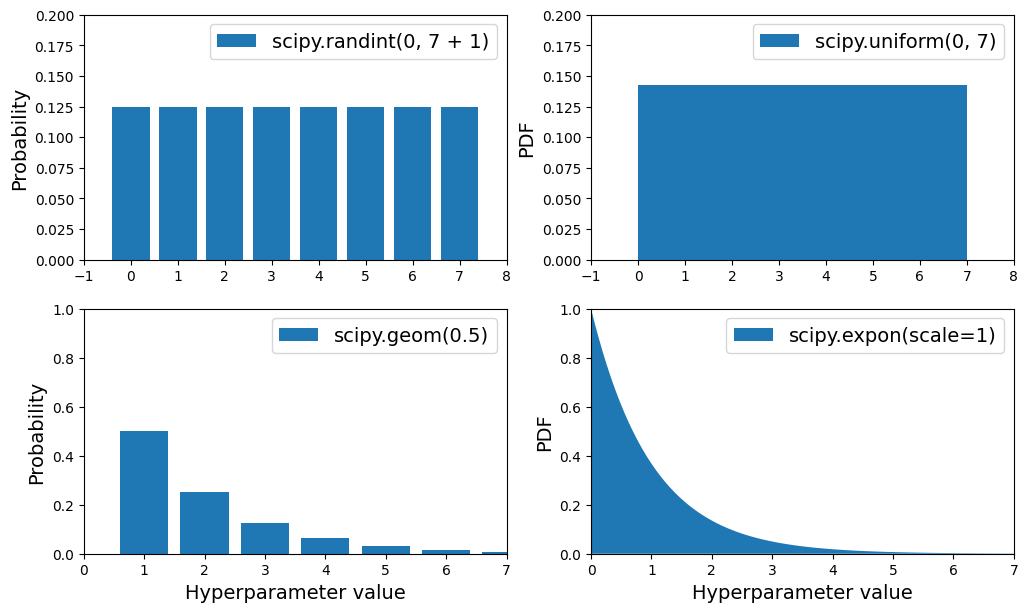

In [259]:
# 추가 코드 – 랜덤 서치에서 사용할 수 있는 몇가지 분포에 대한 그래프

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

다음은 `expon()`와 `loguniform()`의 확률 밀도 함수(왼쪽 열), log(X)의 확률 밀도 함수(오른쪽 열)입니다. 오른쪽 열은 하이퍼파라미터 스케일의 분포를 보여줍니다. `expon()`는 대체적으로 원하는 스케일을 따라 하이퍼파라미터를 선택하고 작은 스케일 쪽으로는 긴 꼬리를 형성합니다. 하지만 `loguniform()`는 스케일에 영향을 받지 않고 모두 동일한 확률을 가집니다:

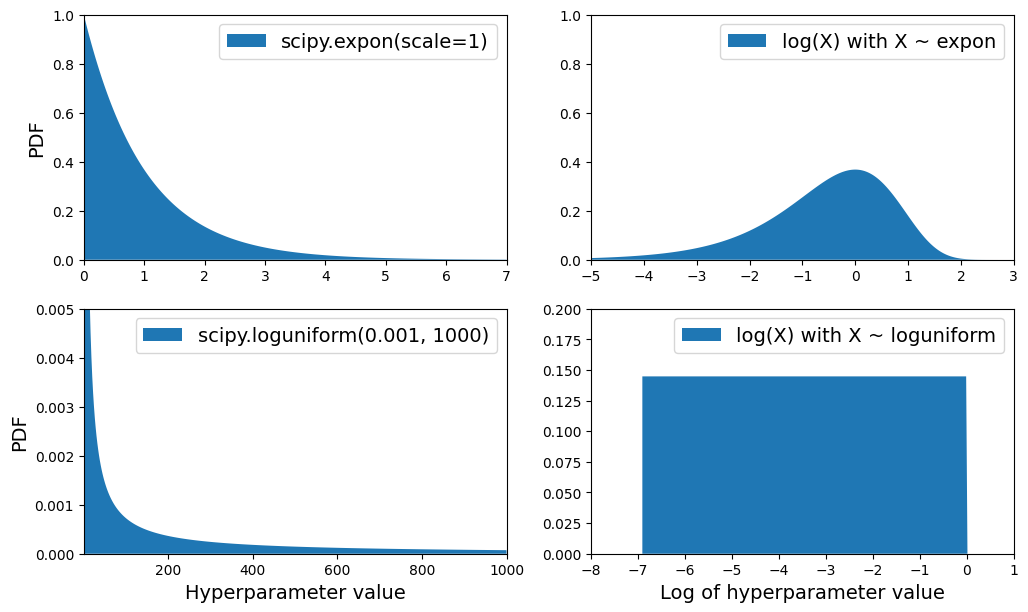

In [260]:
# 추가 코드 – expon와 loguniform의 차이를 보여줍니다

from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

## 2.7.4 최상의 모델과 오차 분석

In [261]:
# final_model = ...
final_model = rnd_search.best_estimator_  # 전처리 포함됨
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.12, 0.1 , 0.05, 0.03, 0.03, 0.04, 0.03, 0.42, 0.02, 0.15, 0.  ,
       0.  , 0.01])

In [262]:
# sorted()
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(np.float64(0.4189255785756395), 'num__median_income'),
 (np.float64(0.1510086361742224), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.12395149906569793), 'num__longitude'),
 (np.float64(0.10148460160912935), 'num__latitude'),
 (np.float64(0.052590624778787426), 'num__housing_median_age'),
 (np.float64(0.041088078673043524), 'num__population'),
 (np.float64(0.030850321278850512), 'num__total_rooms'),
 (np.float64(0.02807868251501548), 'num__total_bedrooms'),
 (np.float64(0.025353423870723507), 'num__households'),
 (np.float64(0.015395901118160943), 'cat__ocean_proximity_<1H OCEAN'),
 (np.float64(0.008455690432303122), 'cat__ocean_proximity_NEAR OCEAN'),
 (np.float64(0.00250561350462621), 'cat__ocean_proximity_NEAR BAY'),
 (np.float64(0.00031134840380033635), 'cat__ocean_proximity_ISLAND')]

## 2.7.5 테스트 세트로 시스템 평가하기

In [263]:
# X_test = ...
# y_test = ...
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

50708.31947114154


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


테스트 RMSE에 대한 95% 신뢰 구간을 계산합니다:

In [264]:
# from scipy import stats
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([48344.70996255, 52966.55874995])

다음과 같이 수동으로 계산할 수도 있습니다:

In [265]:
# 추가 코드 – RMSE에 대한 신뢰 구간 계산 방법
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(np.float64(48344.709962550405), np.float64(52966.55874994698))

또한 t-점수 대신 z-점수를 사용할 수 있습니다. 테스트 세트가 너무 작지 않기 때문에 큰 차이가 없습니다:

In [266]:
# 추가 코드 – z-점수를 사용해 신뢰 구간 계산하기
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(np.float64(48345.4200976103), np.float64(52965.910572369874))

## 2.8 `joblib`를 사용한 모델 저장

최종 모델을 저장합니다:

In [267]:
# joblib.dump()
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

이제 모델을 제품 환경에 배포할 수 있습니다. 예를 들어, 제품 환경에서 실행하기 위한 스크립트는 다음과 같을 것입니다:

In [268]:
# joblib.load()

import joblib

# 추가 코드 – 책에는 간결함을 위해 제외함
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # 새로운 구역이라 가정
predictions = final_model_reloaded.predict(new_data)

In [269]:
predictions

array([467556.07, 105184.  , 102762.  , 332842.02, 103703.  ])

`pickle`을 사용할 수도 있지만 `joblib`이 더 효율적입니다.

# 연습문제 해답

## 1.

문제: _서포트 벡터 머신 회귀(`sklearn.svm.SVR`)를 `kernel=“linear”`(하이퍼파라미터 `C`를 바꿔가며)나 `kernel=“rbf”`(하이퍼파라미터 `C`와 `gamma`를 바꿔가며) 등의 다양한 하이퍼파라미터 설정으로 시도해보세요. 서포트 벡터 머신은 대용량 데이터셋에 적용하기가 쉽지 않습니다. 따라서 훈련 세트의 처음 5,000개 샘플만 사용해 모델을 훈련하고 3-겹 교차 검증을 사용하세요. 그렇지 않으면 몇 시간이 걸릴 것입니다. 지금은 이 하이퍼파라미터가 무엇을 의미하는지 너무 신경 쓰지 마세요(궁금하다면 5장 노트북을 참고하세요). 최상의 `SVR` 모델은 무엇인가요?_

In [270]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['ocean_proximity'])])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                     10000.0, 30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

(3-겹 교차 검증을 사용해 평가한) 최상의 모델이 달성한 점수는 다음과 같습니다:

In [271]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

np.float64(65353.43409942269)

`RandomForestRegressor`보다 훨씬 좋지 않네요(하지만 훨씬 적은 데이터로 훈련했습니다). 최상의 하이퍼파라미터를 확인해 보죠:

In [272]:
grid_search.best_params_

{'svr__C': 30000.0, 'svr__kernel': 'linear'}

선형 커널이 RBF 커널보다 성능이 나은 것 같습니다. `C`는 테스트한 것 중에 최대값이 선택되었습니다. 따라서 (작은 값들은 지우고) 더 큰 값의 `C`로 그리드서치를 다시 실행해 보아야 합니다. 아마도 더 큰 값의 `C`에서 성능이 높아질 것입니다.

## 2.

문제: _`GridSearchCV`를 `RandomizedSearchCV`로 바꿔보세요._

**경고**: 다음 셀은 실행하는데 몇 분이 걸립니다. `RandomizedSearchCV`를 만들 때 `verbose=2`로 지정하면 훈련 상세 과정을 볼 수 있습니다.

In [273]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, loguniform

# `expon()`, `loguniform()`와 다른 확률 분포 함수에 대해서는
# https://docs.scipy.org/doc/scipy/reference/stats.html 참조하세요.

# 노트: 커널이 "linear"일 때 gamma는 무시됩니다
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income']),
                                                                              ('cat',
                                                                               Pipeline(ste...
                                                                                                OneHotEncoder(sparse_output=False))]),
                                                                               ['ocean_proximity'])])),
                                             ('svr', SVR())]),
                   n_iter=50,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x77d1107f65a0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x77d11060ddf0>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

(3-겹 교차 검증을 사용해 평가한) 최상의 모델이 달성한 점수는 다음과 같습니다:

In [274]:
svr_rnd_search_rmse = -rnd_search.best_score_
svr_rnd_search_rmse

np.float64(55491.39850132085)

훨씬 좋아졌지만 아직 `RandomForestRegressor`의 성능에는 못미칩니다. 최상의 하이퍼파라미터를 확인해 보죠:

In [275]:
rnd_search.best_params_

{'svr__C': np.float64(157055.10989448498),
 'svr__gamma': np.float64(0.26497040005002437),
 'svr__kernel': 'rbf'}

이번에는 RBF 커널에 대해 최적의 하이퍼파라미터 조합을 찾았습니다. 보통 랜덤 서치가 같은 시간안에 그리드 서치보다 더 좋은 하이퍼파라미터를 찾습니다.

`gamma`에 대해 스케일이 1인 `expon()`을 사용했기 때문에 `RandomSearch`가 대체적으로 이 스케일의 값에 대해 탐색합니다. 샘플의 80%는 0.1과 2.3 사이에 있습니다(약 10%는 더 작은 값이고 약 10%는 더 큰 값이 됩니다):

In [276]:
np.random.seed(42)

s = expon(scale=1).rvs(100_000)  # 100,000개 샘플을 얻습니다
((s > 0.105) & (s < 2.29)).sum() / 100_000

np.float64(0.80066)

`C`에 대해 `loguniform()` 분포를 사용했습니다. 이는 랜덤 서치를 수행하기 전에 `C`의 최적 값에 대한 단서가 없다는 의미입니다. 이 함수는 20에서 200까지 범위와 2,000에서 20,000까지 범위를 동일한 비율로 탐색합니다.

## 3.

질문: _가장 중요한 특성을 선택하는 `SelectFromModel` 변환기를 준비 파이프라인에 추가해보세요._

이전에 정의한 전처리 파이프라인 다음과 최종 회귀 모델 전에 `RandomForestRegressor` 기반의 `SelectFromModel` 변환기를 추가하는 파이프라인을 만들어 보죠:

In [277]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [278]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

count        3.000000
mean     55478.904424
std       1719.130045
min      54092.211532
25%      54517.166117
50%      54942.120703
75%      56172.250870
max      57402.381037
dtype: float64

흠, 특성 선택이 큰 도움이 되지 않는 것 같군요. 하지만 임곗값이 최적이 아니기 때문일지도 모릅니다. 랜덤 서치나 그리드 서치로 이 값을 튜닝해 보면 어떨까요?

## 4.

문제: _`fit()` 메서드 안에서 k-최근접 이웃 회귀(`sklearn.neighbors.KNeighborsRegressor`)를 훈련하고 `transform()` 메서드에서 이 모델의 예측을 반환하는 사용자 정의 변환기를 만들어 보세요. 이 변환기의 입력으로 위도와 경도를 사용하고 예측 결과를 하나의 특성으로 전처리 파이프라인에 추가하세요. 이렇게 하면 가장 가까운 구역의 중간 주택 가격에 대한 특성이 모델에 추가됩니다._

k-최근접 이웃 회귀에 국한하지 말고 어떤 회귀 모델도 받을 수 있는 변환기를 만들어 보죠. 이를 위해 `MetaEstimatorMixin`를 상속하고 생성자에서 `estimator` 매개변수를 받습니다. `fit()` 메서드는 이 추정기를 복사해서 사용하고 `feature_names_in_`를 저장해야 합니다. `MetaEstimatorMixin`는 필수 매개변수로 `estimator`가 전달되었는지 확인하고 추정기의 하이퍼파라미터를 튜닝에 사용가능하도록 `get_params()`와 `set_params()`를 업데이트합니다. 마지막으로 `get_feature_names_out()` 메서드를 만듭니다.

In [279]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone

class FeatureFromRegressor(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self  # 항상 self를 반환해야 합니다!

    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

사이킷런 API를 준수하는지 확인해 보죠: